In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes

In [3]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [4]:
combined['date'] = combined['date'].astype("datetime64")

In [5]:
combined_sub = combined.drop(columns=['Unnamed: 0','Date','locationcol'])

In [6]:
list(combined_sub.columns)

['date',
 'County_FIPS',
 'StateCD',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 

## Examine per-county distributions

In [140]:
county = combined_sub.groupby(["Name","State","County_FIPS"])[combined_sub.columns].mean()

In [144]:
county = pd.DataFrame(county) #.reset_index(inplace=True)

In [145]:
county.reset_index(inplace=True)

In [146]:
county.retail_and_recreation_PCT_CFB_RollingAvg.describe()

count    2353.000000
mean       -8.328737
std        11.490205
min       -64.642857
25%       -13.760204
50%        -6.993651
75%        -1.342857
max        55.383777
Name: retail_and_recreation_PCT_CFB_RollingAvg, dtype: float64

In [122]:
county_samp = county.sample(frac=.1)

In [123]:
county.PCT_Hisp_ACS.describe()

count    2823.000000
mean        9.147540
std        13.683896
min         0.000000
25%         2.104021
50%         4.065384
75%         9.320412
max        99.184800
Name: PCT_Hisp_ACS, dtype: float64

In [124]:
sns.pairplot(county_samp, hue="Metro", height=4)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1c669560> (for post_execute):


KeyboardInterrupt: 

In [16]:
county[county.Name.str.contains("Fairfax")]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
2615,51600,Fairfax city,VA,23580.0,4.85581,16.899915,1,Large_metro,8,33.927057


In [19]:
county.Deaths_PER_100K.describe()

count    2823.000000
mean       64.603104
std        59.626855
min         0.000000
25%        23.230882
50%        49.270007
75%        87.997868
max       519.210800
Name: Deaths_PER_100K, dtype: float64

In [21]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.max()/2)]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
42,01085,Lowndes County,AL,10362.0,74.522293,0.685196,2,Smaller_metro,29,279.868751
79,04001,Apache County,AZ,71602.0,0.508366,6.108768,6,Noncore_adjacent,187,261.165889
133,05081,Little River County,AR,12494.0,20.481831,3.313591,2,Smaller_metro,39,312.149832
143,05101,Newton County,AR,7898.0,0.012661,1.367435,8,Micropolitan,21,265.890099
350,12125,Union County,FL,15300.0,22.137255,5.431373,4,Noncore_adjacent,53,346.405229
400,13099,Early County,GA,10405.0,50.956271,2.152811,6,Noncore_adjacent,36,345.987506
419,13141,Hancock County,GA,8667.0,73.012576,1.799931,8,Micropolitan,45,519.210800
431,13165,Jenkins County,GA,8929.0,35.759884,6.439691,6,Noncore_adjacent,33,369.582260
432,13167,Johnson County,GA,9800.0,33.765306,2.326531,8,Micropolitan,28,285.714286
468,13243,Randolph County,GA,7206.0,59.741882,1.665279,6,Noncore_adjacent,30,416.319734


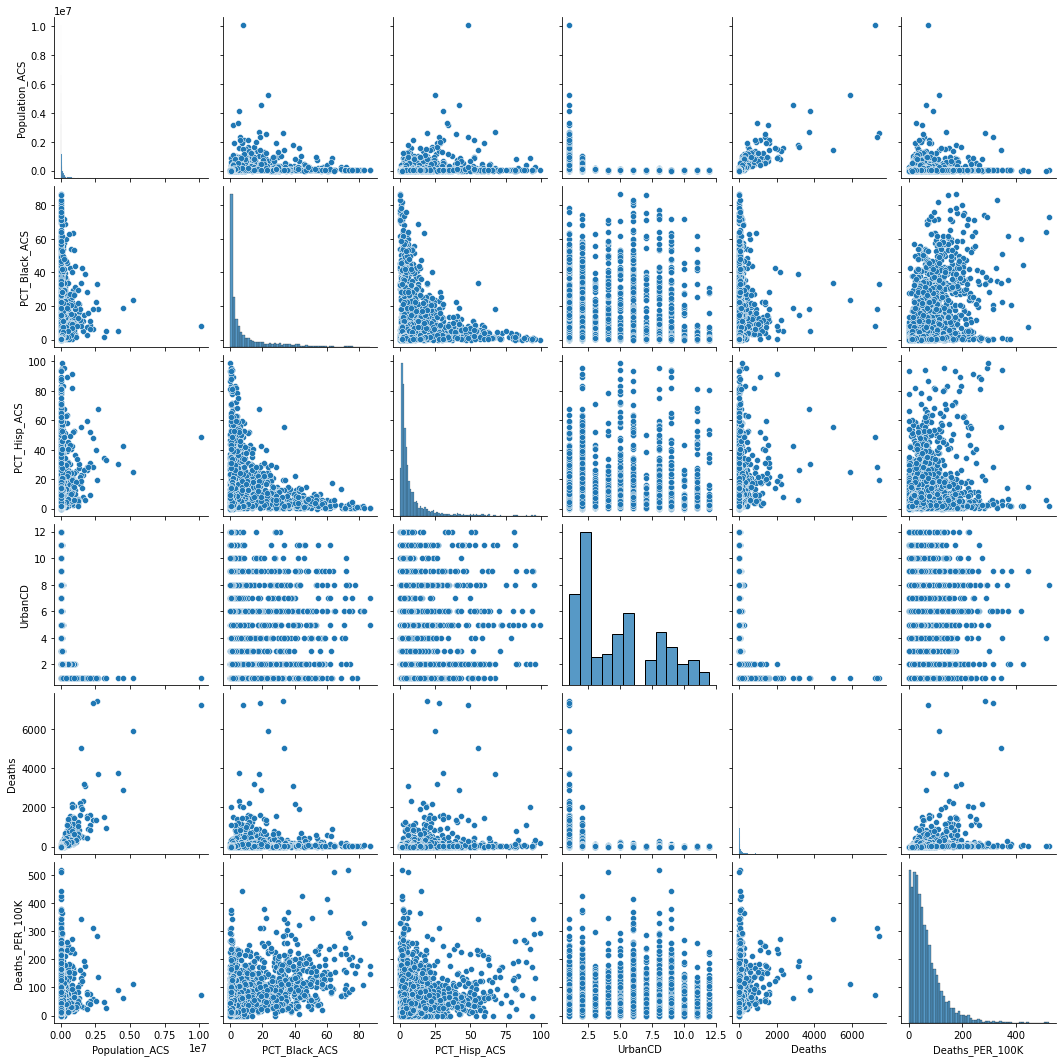

In [35]:
sns.pairplot(county)

In [23]:
county[county.Metro.isna() == True]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K


In [112]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]

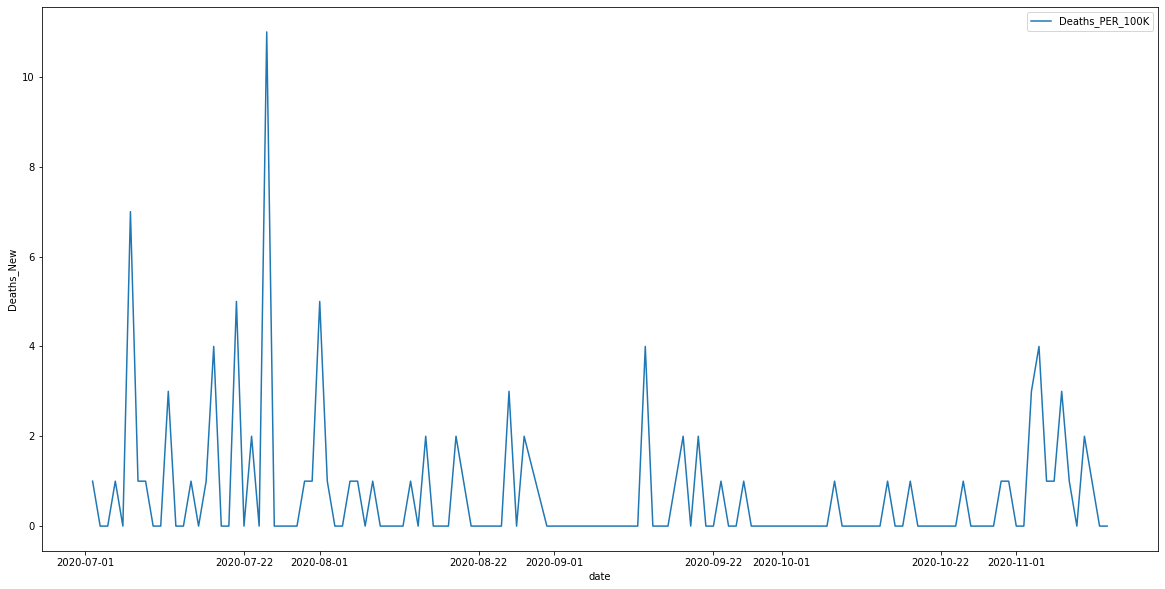

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 


#sns.lineplot(x="date", y="Confirmed_New_PER_100K", label = "Confirmed_PER_100K", data=bigh)

sns.lineplot(x="date", y="Deaths_New", label="Deaths_PER_100K", data=bigh[bigh.date > '2020-07-01'])

#plt.set_fiz(10, 8.5)

plt.legend()

plt.show()

In [98]:
bigh[(bigh.date >= "2020-06-01") &(bigh.date <= "2020-07-01")][['date','Deaths_New','Deaths_New_7','Deaths_New_7_RollingAvg','Deaths_New_7_RollingAvg_PER_100K']]

,date,Deaths_New,Deaths_New_7,Deaths_New_7_RollingAvg,Deaths_New_7_RollingAvg_PER_100K
592729,2020-06-01,3.0,3.0,6.142857,0.767472
592730,2020-06-02,5.0,12.0,7.142857,0.892410
592731,2020-06-03,15.0,1.0,5.142857,0.642535
592732,2020-06-04,7.0,0.0,4.142857,0.517598
592733,2020-06-05,8.0,5.0,3.714286,0.464053
592734,2020-06-06,-1.0,13.0,5.714286,0.713928
592735,2020-06-07,6.0,4.0,5.428571,0.678231
592736,2020-06-08,3.0,6.0,5.857143,0.731776
592737,2020-06-09,12.0,0.0,4.142857,0.517598
592738,2020-06-10,1.0,4.0,4.571429,0.571142


In [114]:
bigh.columns

Index(['date', 'County_FIPS', 'StateCD', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
       'Confirmed_

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
#sns.lineplot(x="date", y="Confirmed_New_PER_100K", label = "Confirmed_PER_100K", data=bigh)

sns.violinplot(x="State", y="workplaces_PCT_CFB_RollingAvg", label="work", data=county)

#plt.set_fiz(10, 8.5)

plt.legend()

plt.show()

ValueError: Could not interpret input 'State'

<Figure size 1440x720 with 0 Axes>

In [152]:
county.State

0       South Carolina
1            Louisiana
2             Virginia
3                Idaho
4                 Iowa
             ...      
2818        California
2819           Arizona
2820          Colorado
2821             Texas
2822             Texas
Name: State, Length: 2823, dtype: object

In [179]:
combined_sub['mob_score'] = (combined_sub['Population_ACS']/100000)*(combined_sub['workplaces_PCT_CFB_RollingAvg']/100)

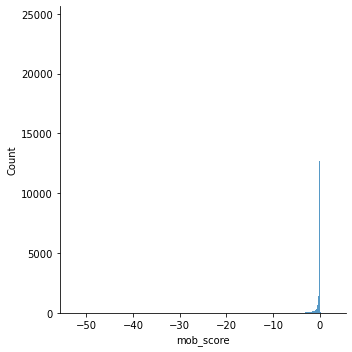

In [180]:
sns.displot(combined_sub.mob_score)

In [181]:
west = combined_sub[combined_sub.State.isin(["Colorado","Arizona","Texas","Utah","Nevada"])]

In [186]:
plt.figure(figsize=(9,16)) 
sns.violinplot(data=west,y="log_score", x="State", group="State",split=True)
#help(sns.violinplot)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

<Figure size 648x1152 with 0 Axes>

In [183]:
west.groupby("State")['mob_score'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Arizona,3738.0,-1.497195,3.716816,-19.708948,-0.697474,-0.312328,-0.098559,1.187286
Colorado,10257.0,-0.433040,0.762598,-3.886647,-0.326736,-0.066995,-0.027806,0.250650
Nevada,2493.0,-1.023487,2.533462,-12.252129,-0.193250,-0.102364,-0.035152,0.211244
Texas,41230.0,-0.512443,1.680355,-22.045743,-0.220451,-0.075464,-0.033306,1.357656
Utah,4775.0,-0.484117,0.947096,-5.312160,-0.378048,-0.097547,-0.032939,0.363630


In [185]:
import numpy as np
west['log_score'] = west['mob_score'].apply(np.log) 

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
